In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
benign=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/2/2.benign.csv')
g_c=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/2/2.gafgyt.combo.csv')
g_j=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/2/2.gafgyt.junk.csv')
g_s=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/2/2.gafgyt.scan.csv')
g_t=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/2/2.gafgyt.tcp.csv')
g_u=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/2/2.gafgyt.udp.csv')
m_a=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/2/2.mirai.ack.csv')
# m_sc=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/1/1.mirai.scan.csv')
# m_sy=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/1/1.mirai.syn.csv')
# # m_u=pd.read_csv('/content/drive/MyDrive/iot-dataset/1/1.mirai.udp.csv')
# # m_u_p=pd.read_csv('/content/drive/MyDrive/iot-dataset/1/1.mirai.udpplain.csv')

In [23]:
benign['type']='benign'
# m_u['type']='attack'
g_c['type']='combo'
g_j['type']='junk'
g_s['type']='scan'
g_t['type']='tcp'
g_u['type']='udp'
m_a['type']='ack'
# m_sc['type']='mirai.scan'
# m_sy['type']='mirai.syn'
# # m_u_p['type']='attack'

In [24]:
data=pd.concat([benign,g_c,g_j,g_s,g_t,g_u, m_a],
               axis=0, sort=False, ignore_index=True)

In [25]:
data.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,type
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,benign
1,1.000000,110.000000,0.000000,1.000000,110.000000,0.000000,1.000000,110.000000,0.000000,1.000000,...,0.0,0.0,1.238636,106.146795,7.887770,106.146795,62.216910,0.0,0.0,benign
2,1.724055,91.439104,249.441812,1.823878,92.454965,253.612868,1.937463,93.483558,255.733288,1.993563,...,0.0,0.0,1.000000,78.000000,0.000000,78.000000,0.000000,0.0,0.0,benign
3,1.000000,342.000000,0.000000,1.000000,342.000000,0.000000,1.000000,342.000000,0.000000,1.000000,...,0.0,0.0,2.487473,341.959189,7.347919,341.959189,53.991908,0.0,0.0,benign
4,2.516815,90.867308,150.827639,2.688981,91.541993,160.705060,2.888469,92.277536,169.944112,2.988463,...,0.0,0.0,2.237519,98.930412,9.942635,98.930412,98.855983,0.0,0.0,benign


In [26]:
data.groupby('type')['type'].count()

type
ack       113285
benign     13113
combo      53012
junk       30312
scan       27494
tcp        95021
udp       104791
Name: type, dtype: int64

In [27]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [28]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
x, y = rus.fit_resample(x, y)


In [29]:
from collections import Counter
print(sorted(Counter(y).items()))

[('ack', 13113), ('benign', 13113), ('combo', 13113), ('junk', 13113), ('scan', 13113), ('tcp', 13113), ('udp', 13113)]


In [30]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [31]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)

In [32]:
x = x.reshape(x.shape[0], x.shape[1], 1)
print(x.shape)

(91791, 115, 1)


In [33]:
y

array([0, 0, 0, ..., 6, 6, 6])

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,shuffle=True)

In [35]:
from keras import Sequential
from keras.layers import Dense, Conv1D, Flatten, LSTM


In [36]:
#Create model
model = Sequential()
model.add(LSTM(40, activation='relu',input_shape=(115,1,),return_sequences=True))    # the batch size is neglected!
model.add(LSTM(16, return_sequences=True))  # returns a sequence of vectors of dimension 16
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))


model.add(Dense(7, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 115, 40)           6720      
                                                                 
 lstm_3 (LSTM)               (None, 115, 16)           3648      
                                                                 
 flatten_1 (Flatten)         (None, 1840)              0         
                                                                 
 dense_3 (Dense)             (None, 128)               235648    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 7)                 455       
                                                                 
Total params: 254,727
Trainable params: 254,727
Non-tr

In [37]:
#Fitting the data to the training dataset
history = model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=10)

Epoch 1/10
2295/2295 [==============================] - 272s 117ms/step - loss: 0.4024 - accuracy: 0.7670 - val_loss: 0.3316 - val_accuracy: 0.7942
Epoch 2/10
2295/2295 [==============================] - 260s 113ms/step - loss: 0.3191 - accuracy: 0.7991 - val_loss: 0.3035 - val_accuracy: 0.8087
Epoch 3/10
2295/2295 [==============================] - 273s 119ms/step - loss: 0.2608 - accuracy: 0.8335 - val_loss: 0.2259 - val_accuracy: 0.8494
Epoch 4/10
2295/2295 [==============================] - 282s 123ms/step - loss: 0.2299 - accuracy: 0.8462 - val_loss: 0.2190 - val_accuracy: 0.8544
Epoch 5/10
2295/2295 [==============================] - 280s 122ms/step - loss: 0.2222 - accuracy: 0.8488 - val_loss: 0.2302 - val_accuracy: 0.8469
Epoch 6/10
2295/2295 [==============================] - 278s 121ms/step - loss: 0.2194 - accuracy: 0.8482 - val_loss: 0.2144 - val_accuracy: 0.8493
Epoch 7/10
2295/2295 [==============================] - 270s 118ms/step - loss: 0.2175 - accuracy: 0.8498 - val_

In [38]:
y_pred=model.predict(X_test)
y_pred = y_pred.argmax(axis=-1)

# **ploting and results**

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, matthews_corrcoef, f1_score, precision_score, recall_score

print(f"Accuracy   : {accuracy_score(y_test, y_pred)}")
# print(f"Precision  : {precision_score(y_test, y_pred)}")
# print(f"F1-Measure : {f1_score(y_test, y_pred)}")
print(f"MCC        : {matthews_corrcoef(y_test, y_pred)}")
# print(f"Recall     : {recall_score(y_test, y_pred)}")

Accuracy   : 0.8512990903643989
MCC        : 0.8470695366264342


In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2576
           1       1.00      1.00      1.00      2619
           2       1.00      0.96      0.98      2638
           3       0.96      1.00      0.98      2623
           4       1.00      1.00      1.00      2701
           5       0.50      1.00      0.66      2576
           6       0.00      0.00      0.00      2626

    accuracy                           0.85     18359
   macro avg       0.78      0.85      0.80     18359
weighted avg       0.78      0.85      0.80     18359



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


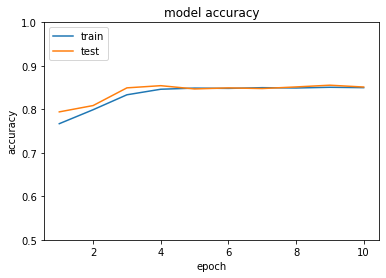

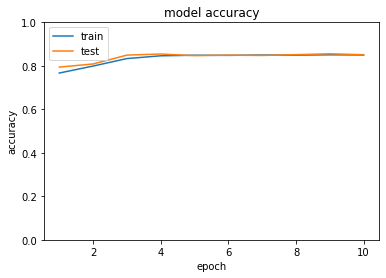

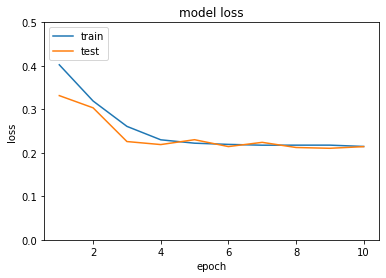

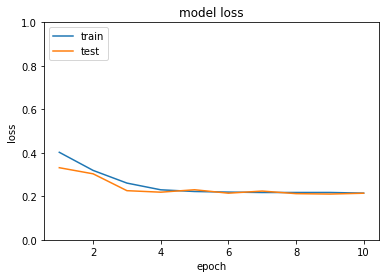

In [41]:
#Accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1,len(acc) + 1)
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc , label='Validation accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim([0.5, 1])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc , label='Validation accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim([0, 1])
plt.legend(['train', 'test'], loc='upper left')
plt.show()




#Loss

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss) + 1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss , label='Validation loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim([0, 0.5])
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss , label='Validation loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim([0, 1])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

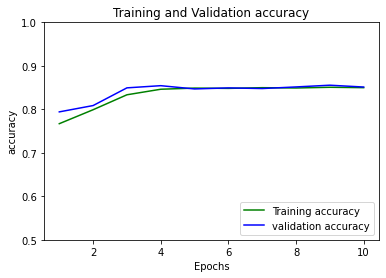

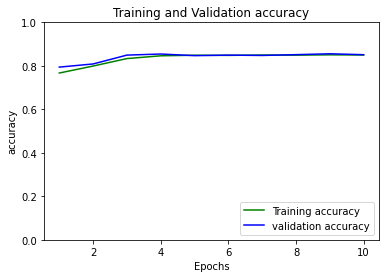

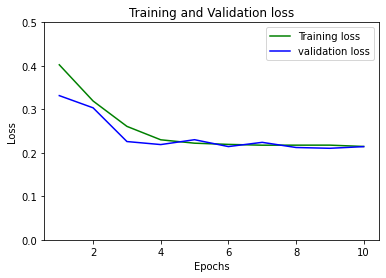

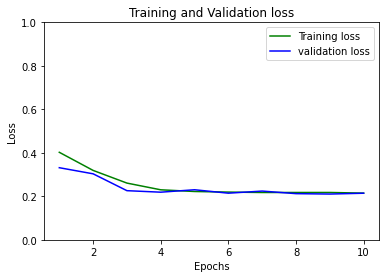

In [42]:
# Accuracy
acc = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,len(acc) + 1)
plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()


plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


#loss
loss = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,len(acc) + 1)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 0.5])
plt.legend(loc='upper right')
plt.show()



plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.show()

[[2575    0    0    0    0    1    0]
 [   0 2618    0    0    1    0    0]
 [   0    0 2543   95    0    0    0]
 [   1    0    2 2618    1    1    0]
 [   0    1    1    0 2699    0    0]
 [   0    0    0    0    0 2576    0]
 [   0    1    0    0    0 2625    0]]


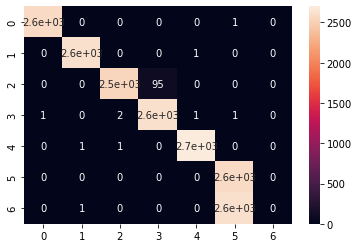

In [43]:
#Confusion matrix 
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)